# Lasso(L1) and Ridge(L2) Regularization

The Auto MPG dataset is a classic dataset often used in machine learning and data analysis. It contains information on the fuel efficiency of various automobile models manufactured in the late 20th century, along with other attributes of the cars. The primary goal of analyzing this dataset is to understand factors that influence a car's miles-per-gallon (mpg) performance and to potentially build predictive models for fuel efficiency.

**Dataset Details:**
* Total Records: 398 cars
* Time Period: Covers cars manufactured between 1970 and 1982.
**Attributes:**
  * mpg: The miles per gallon of the car, representing its fuel efficiency.
  * Cylinders: Number of engine cylinders, a measure often associated with engine     power and fuel consumption.
  * Displacement: Engine size measured in cubic inches.
  * Horsepower: Engine output power, influencing performance and fuel economy.
  * Weight: Vehicle weight in pounds, which affects fuel efficiency and acceleration.
  * Acceleration: Time required for the car to accelerate, indicative of its     performance capabilities.
  * Model Year: Year of manufacture, offering insights into technological progress and efficiency improvements over time.
  * Origin: Region where the car was manufactured, categorized as:
  * 1 = USA
  * 2 = Europe
  * 3 = Japan
  * Car Name: Descriptive name of the car model.
**Importance of the Dataset:**
This dataset is widely used for exploring:

1.**Fuel Efficiency Trends:** Investigating how vehicle design and engine specifications influence fuel economy.

2.**Regression Analysis:** Using features such as weight, horsepower, and displacement to predict mpg.

3.**Impact of Geography and Technology:** Comparing cars from different regions and years to evaluate trends in automotive engineerin

## Import libraries

In [115]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning Libraries


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Read the CSV file

In [121]:
data = pd.read_csv("auto-mpg.csv")

In [123]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [125]:
data.shape

(398, 9)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Check the null values

In [130]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Data Cleaning

In [133]:
data[data.horsepower.str.isdigit() == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [135]:
data['horsepower'] = data['horsepower'].replace('?',np.nan)  #replace ? with nan

In [137]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [139]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [141]:
data['horsepower']=data['horsepower'].astype('float64')

In [143]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())

In [145]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

C:\Users\wwwmu\AppData\Local\Temp\ipykernel_8340\911360003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cylinders'], color ='purple')
C:\Users\wwwmu\AppData\Local\Temp\ipykernel_8340\911360003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['displacement'], color ='green')


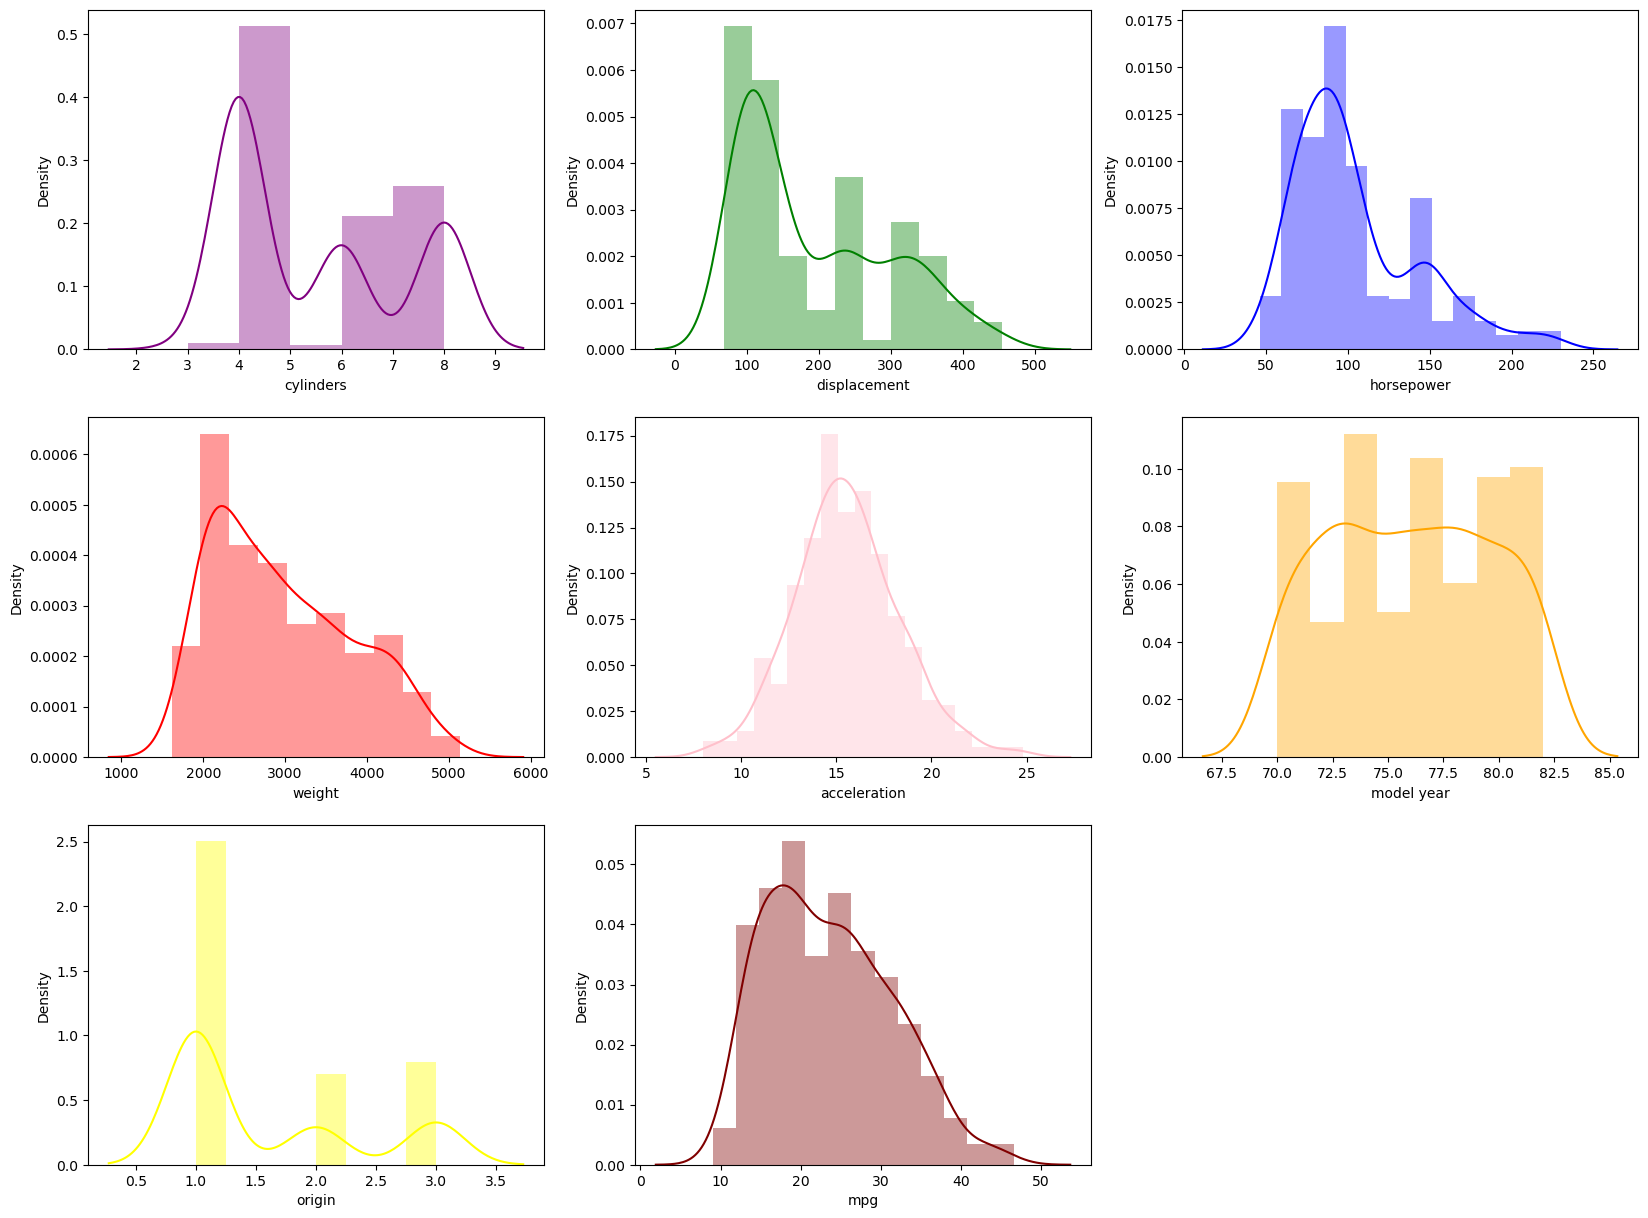

In [147]:
plt.figure(figsize =(20,15))
plt.subplot(3,3,1)
sns.distplot(data['cylinders'], color ='purple')

plt.subplot(3,3,2)
sns.distplot(data['displacement'], color ='green')

plt.subplot(3,3,3)
sns.distplot(data['horsepower'], color ='blue')

plt.subplot(3,3,4)
sns.distplot(data['weight'], color ='red')

plt.subplot(3,3,5)
sns.distplot(data['acceleration'], color ='pink')

plt.subplot(3,3,6)
sns.distplot(data['model year'], color ='orange')

plt.subplot(3,3,7)
sns.distplot(data['origin'], color ='yellow')

plt.subplot(3,3,8)
sns.distplot(data['mpg'], color ='maroon');


# Data Pre-processing

In [149]:
data = data.drop('car name', axis = 1)

In [150]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [154]:
data.shape

(398, 8)

In [156]:
data.corr().T

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


# Seperate the dependent and independent features:-

In [159]:
X = data.drop('mpg', axis = 1)
y = data[['mpg']]

### scale all the columns of data.this will give a numpy array

In [162]:
from sklearn import preprocessing 

In [164]:
X_scaled = preprocessing.scale(X)
X_scaled =pd.DataFrame(X_scaled, columns = X.columns)

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns = y.columns)

# Train Test Split

In [167]:
from sklearn.model_selection import train_test_split

In [169]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [171]:
print("X_train", X_train.shape)
print('X_test', X_test.shape)
print("y_train", y_train.shape)
print('y_test', y_test.shape)

X_train (278, 7)
X_test (120, 7)
y_train (278, 1)
y_test (120, 1)


# Buuild a Linear Regression Model

In [174]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.3933914726185885
The coefficient for displacement is 0.02281894856267935
The coefficient for horsepower is -0.019872884299422706
The coefficient for weight is -0.007040899059965787
The coefficient for acceleration is 0.06119510660375062
The coefficient for model year is 0.7925439069034929
The coefficient for origin is 1.198885770256522


**Small coefficients so model is not that complex**

In [177]:
intercept = regression_model.intercept_[0]             #This is the predicted value of mpg when all feature values (e.g., cylinders, displacement, horsepower, etc.) are set to zero.
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.745559500957707


# Ridge Regression(L2)

In [201]:
ridge = Ridge(alpha = .3)  #coefficients are presented to become too big by this alpha value
ridge.fit(X_train, y_train)
for i, col in enumerate(X_train.columns):
    print("Ridge model coefficients for {} is:{}".format(col,ridge.coef_[0][i]))

Ridge model coefficients for cylinders is:-0.391010977301528
Ridge model coefficients for displacement is:0.02275383240832429
Ridge model coefficients for horsepower is:-0.019847121051075528
Ridge model coefficients for weight is:-0.0070410493359669415
Ridge model coefficients for acceleration is:0.06104425535520602
Ridge model coefficients for model year is:0.79246146480572
Ridge model coefficients for origin is:1.19514872311192


### Lasso Regression (L1)

In [199]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
for i, col in enumerate(X_train):
    print("Lasso model coefficients for {} is : {}".format(col, lasso.coef_[i]))

Lasso model coefficients for cylinders is : -0.0
Lasso model coefficients for displacement is : 0.01367388948206943
Lasso model coefficients for horsepower is : -0.020033878247769563
Lasso model coefficients for weight is : -0.006941906453989721
Lasso model coefficients for acceleration is : 0.0173193810628511
Lasso model coefficients for model year is : 0.7829827416740951
Lasso model coefficients for origin is : 0.8740281623154392


# Compare The Score

In [186]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8081802739111359
0.8472274567567306


In [188]:
print(ridge.score(X_train, y_train))


0.8081801786048972


In [190]:
print(ridge.score(X_test, y_test))


0.8471949402532152


In [192]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8070482564532553
0.8423221942478804


In [195]:
print(X_train)

     cylinders  displacement  horsepower  weight  acceleration  model year  \
350          4         105.0        63.0    2215          14.9          81   
59           4          97.0        54.0    2254          23.5          72   
120          4         121.0       112.0    2868          15.5          73   
12           8         400.0       150.0    3761           9.5          70   
349          4          91.0        68.0    1985          16.0          81   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0    2790          15.6          82   
255          4         140.0        88.0    2720          15.4          78   
72           8         304.0       150.0    3892          12.5          72   
235          4          97.0        75.0    2265          18.2          77   
37           6         232.0       100.0    3288          15.5          71   

     origin  
350       1  
59        2  
120       2  
12     

In [197]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
350,4,105.0,63.0,2215,14.9,81,1
59,4,97.0,54.0,2254,23.5,72,2
120,4,121.0,112.0,2868,15.5,73,2
12,8,400.0,150.0,3761,9.5,70,1
349,4,91.0,68.0,1985,16.0,81,3
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
255,4,140.0,88.0,2720,15.4,78,1
72,8,304.0,150.0,3892,12.5,72,1
235,4,97.0,75.0,2265,18.2,77,3


# Great Job